# Metaheuristic Optimization
## Lab 1: TSP solution generator

In this lab we implement the following heuristic solution for the TSP: Nearest neighbor insertion

- Start with randomly selected city and insert each new city into the current tour after the city to which it is closest.
- (If there is more than one city to which it is closet, insert it after the first such city you encounter). 

In [298]:
%matplotlib inline
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Define the used methods

In [299]:
def load_data(f):
    count = np.loadtxt(f, delimiter=' ', max_rows=1)
    cities = np.loadtxt(f, delimiter=' ', dtype={'names': ('id', 'x', 'y'), 'formats': ('int', 'float', 'float')}, skiprows=1)
    return count, cities

In [314]:
def insertCities(count, cities):
    idx = int(random.randint(1, count))
    not_visited = cities[cities['id'] != idx]['id'].tolist()
    tsp_list = [idx]
    tsp_cost = 0
    
    for id in not_visited:
        c = cities[cities['id'] == id]
        #new_coord = np.array((float(c['x']), int(c['y'])))
        visited_cities = cities[np.isin(cities['id'], tsp_list)]
        distance = np.array([
            visited_cities['id'],
            np.around(np.sqrt(np.power(visited_cities['x'] - c['x'], 2) + np.power(visited_cities['y'] - c['y'], 2)))
        ])
        nn = int(distance[0][distance[1].argmin()])
        tsp_list.insert(tsp_list.index(nn) + 1, id)
        tsp_cost += distance[1].min()

    #
    # Add the patch back to initial idx
    #
    start = tsp_list[0]
    tsp_list.append(start)
    final_dist = np.around(np.sqrt(np.power(cities[cities['id'] == start]['x'] - cities[cities['id'] == idx]['x'], 2) + np.power(cities[cities['id'] == start]['y'] - cities[cities['id'] == idx]['y'], 2)))
    tsp_cost += final_dist
    
    return tsp_list, int(tsp_cost)

In [333]:
def addCities(count, cities):
    idx = int(random.randint(1, count))
    not_visited = cities[cities['id'] != idx]['id'].tolist()
    tsp_arr = np.array([[idx, 0]])

    while not_visited:
        cur_x = cities[cities['id'] == idx]['x']
        cur_y = cities[cities['id'] == idx]['y']
        remaining_cities = cities[np.isin(cities['id'], not_visited)]
        distance = np.array([
            remaining_cities['id'],
            np.around(np.sqrt(np.power(remaining_cities['x'] - cur_x, 2) + np.power(remaining_cities['y'] - cur_y, 2)))
        ])
        tsp_arr = np.append(tsp_arr, np.array([[distance[0][distance[1].argmin()], distance[1].min()]]), axis=0)
        #print('Nearest neighbor to {} =  {}  -  {}'.format(idx, distance[0][distance[1].argmin()], distance[1].min()))
        not_visited.remove(distance[0][distance[1].argmin()])
        idx = int(distance[0][distance[1].argmin()])

    #
    # Add the patch back to initial idx
    #
    start = tsp_arr[0][0]
    final_dist = np.around(np.sqrt(np.power(cities[cities['id'] == start]['x'] - cities[cities['id'] == idx]['x'], 2) + np.power(cities[cities['id'] == start]['y'] - cities[cities['id'] == idx]['y'], 2)))
    tsp_arr = np.append(tsp_arr, np.array([[start, final_dist]]), axis=0)
    
    return tsp_arr[:, 0].astype(int), tsp_arr[:, 1].sum().astype(int)

In [334]:
def print_solution(cost, path=None):
    print('Cost: {}'.format(cost))
    if path: print('Path: {}'.format(path))

In [335]:
def write_output(f, cost, path):
    with open(f, "wb") as f:
        np.savetxt(f, cost, fmt='%i')
        np.savetxt(f, path, fmt='%i')

In [394]:
def viz_path(path, cities):
    fig, ax = plt.subplots(figsize=(20, 20))

    x = []
    y = []

    for i in path:
        i = int(i) - 1
        x.append(cities[i]['x'])
        y.append(cities[i]['y'])

    
    plt.plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=1, markersize=2)
    plt.plot(x[0], y[0], 'ro')
    plt.show()
    plt.savefig('tsp.png')

## Run TSP with Nearest Neighbor Heuristic and random start location

In [400]:
file = 'inst-9.tsp'
count, cities = load_data(file)

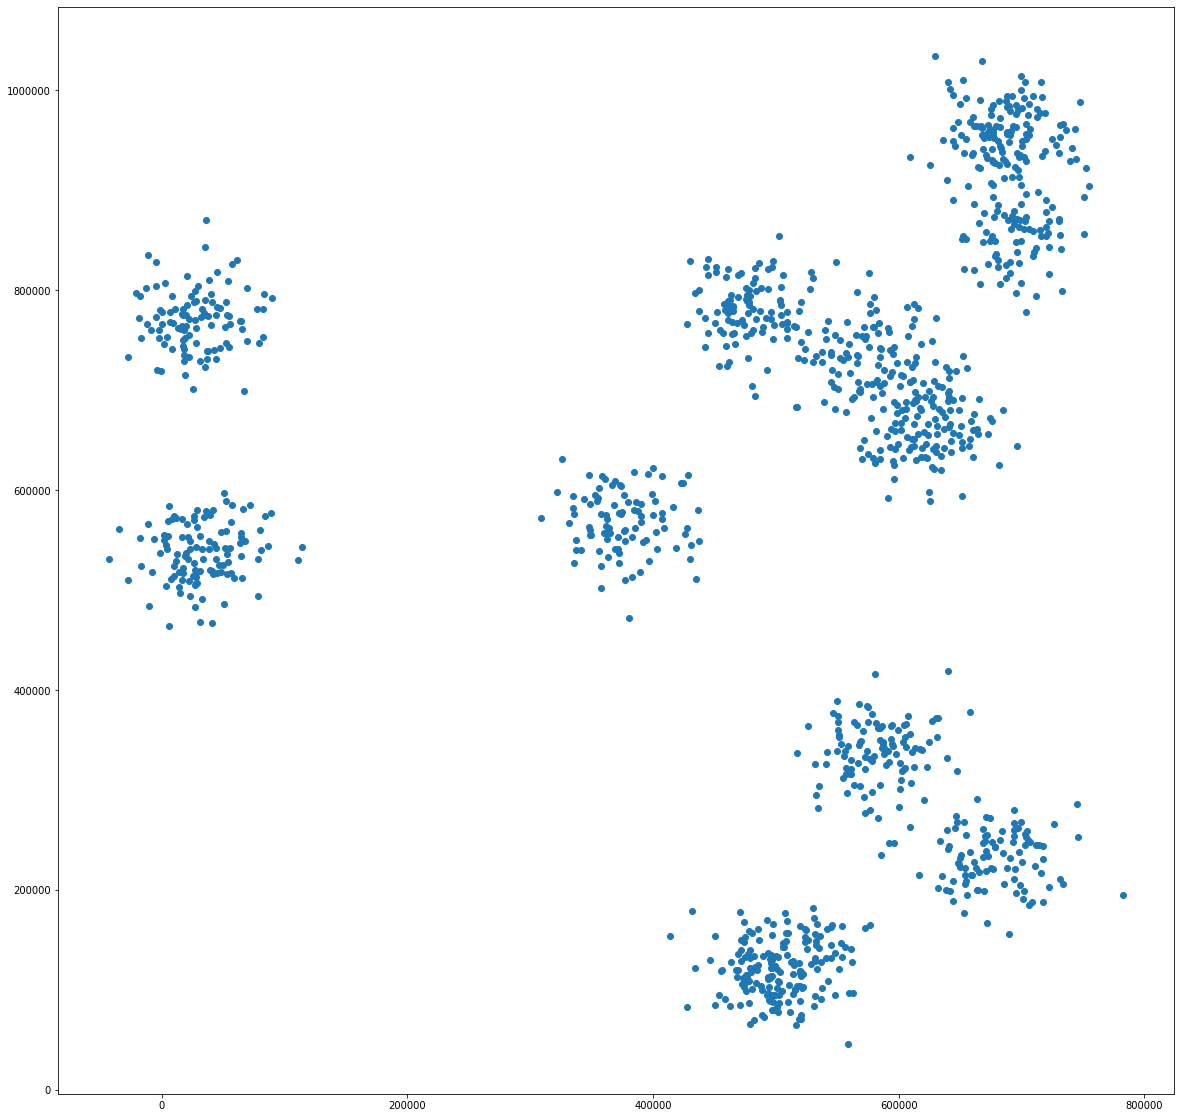

In [401]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.scatter(cities['x'], cities['y'])

---

## Heuristic 1: Add the unassigned city with nearest distance to last assigned city

Cost: [15049941]


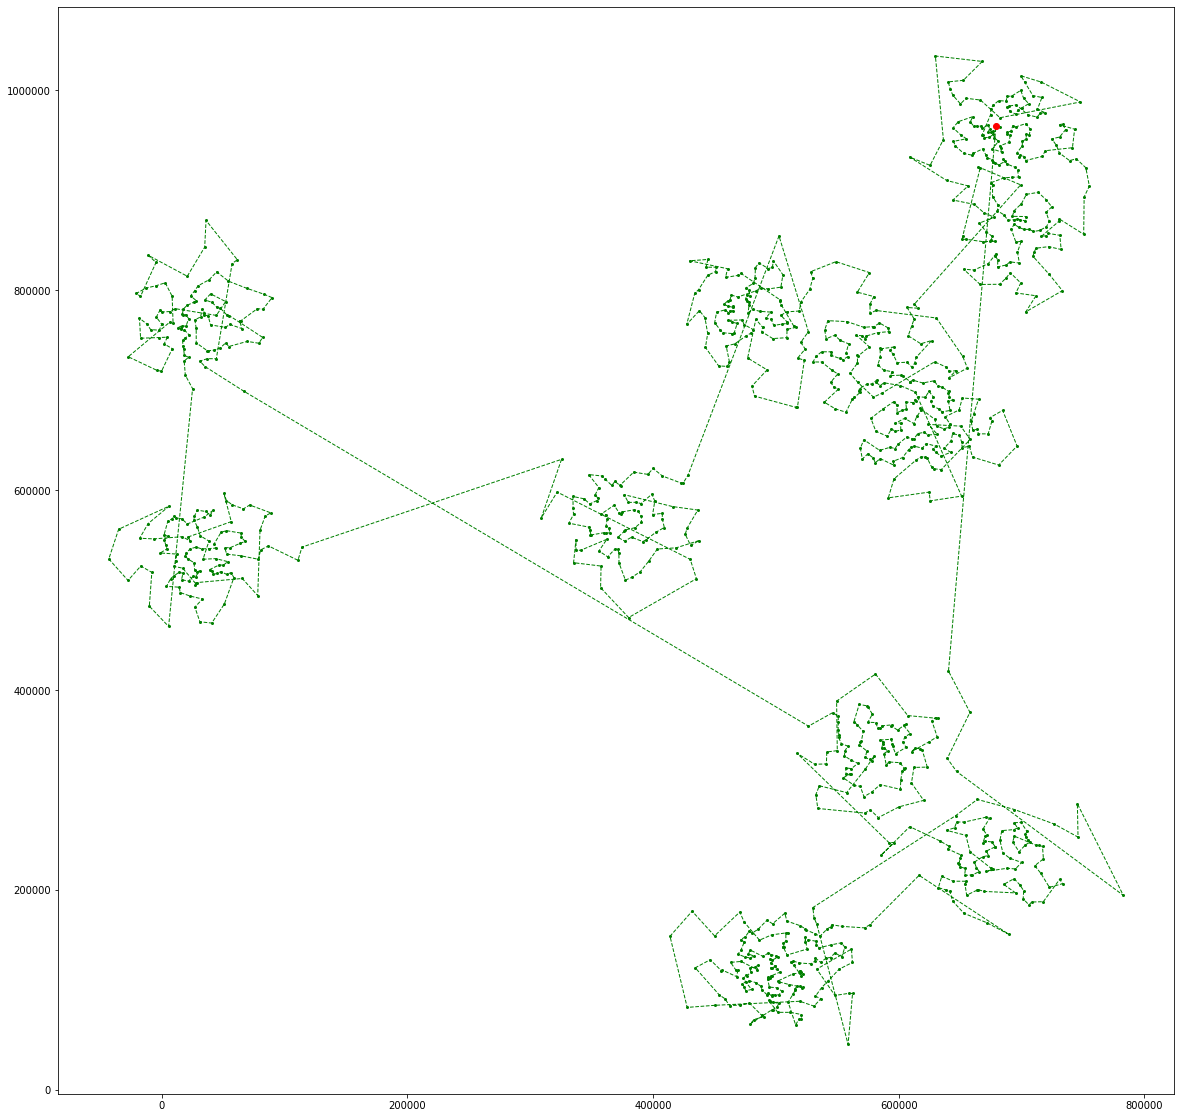

Wall time: 685 ms


<Figure size 432x288 with 0 Axes>

In [402]:
%%time
path, cost = addCities(count, cities)
print_solution(cost)
write_output('solution.tsp', cost, path)
viz_path(path, cities)

---

## Heuristic 2: Insert next unassigned city behind nearest assigned city 

Cost: 15746770


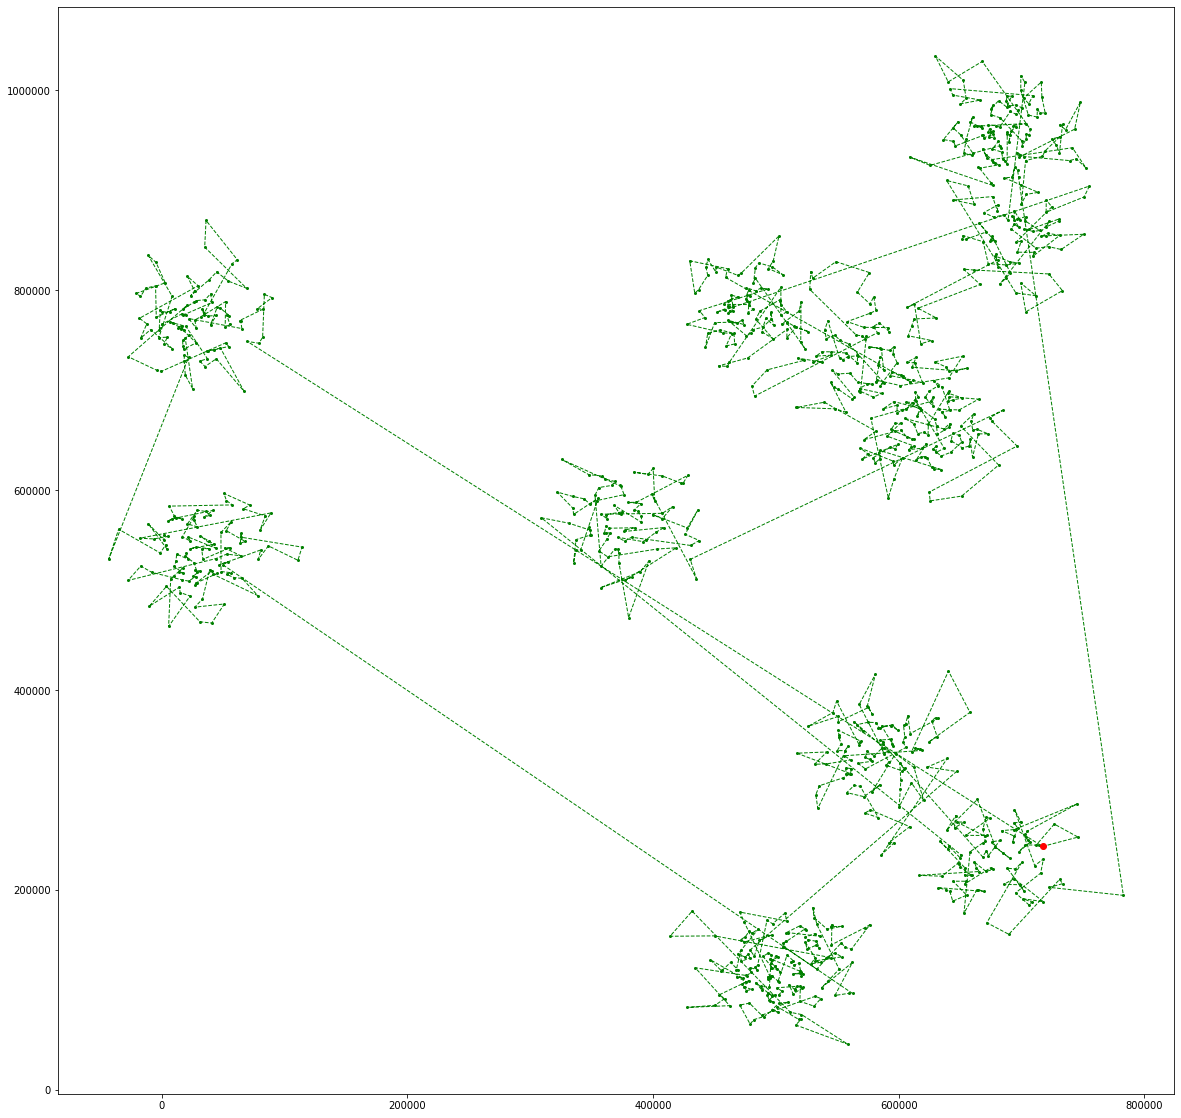

Wall time: 622 ms


<Figure size 432x288 with 0 Axes>

In [403]:
%%time
path, cost = insertCities(count, cities)
print_solution(cost)
write_output('solution.tsp', np.array([cost]), np.array([path]))
viz_path(path, cities)